### iris 데이터셋 활용 꽃잎 너비 예측 모델
- 데이터셋 : iris.csv에서 2개의 Feature 사용
- 구현프레임워크 : Pytorch

[1] 모듈 로딩 및 데이터 준비

In [826]:
## 모듈 로딩
import torch                        # 텐서 및 수치 계산 함수 관련 모듈
import torch.nn as nn               # 인공신경망 관련 모듈
import torch.nn.functional as F     # 손실, 거리 등 함수 관련 모듈
import torch.optim as optimizer     # 최적화 기법 관련 모듈
import pandas as pd

from sklearn.model_selection import train_test_split

In [827]:
torch.manual_seed(1)

In [828]:
# 데이터 로딩 : CSV => DataFrame
DATA_FILE='../../MachineLearning/data/iris.csv'

irisDF=pd.read_csv(DATA_FILE,usecols=[0,1,2,3])
irisDF.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


[2] 모델 준비
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : 선형관계 >> 선형모델 ==> nn.Linear

In [829]:
# in_feature : petal.length 3개
# out_feature : petal.width 1개
model=nn.Linear(3,1)
# nn_model=nn.sequential(nn.Linear(3,10),nn.ReLU(),nn.Linear(10,1)) << 인공신경망!

In [830]:
# 가중치와 졀편 확인
for name, param in model.named_parameters():
    print(f'[{name}],{param}')

[weight],Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True)
[bias],Parameter containing:
tensor([0.2710], requires_grad=True)


[3] 최적화 인스턴스 준비

In [831]:
### 모델의 가중치와 절편을 최적화 ==> 인스턴스에 전달
adam_opti=optimizer.Adam(model.parameters(),lr=0.1)

[4] 학습 ==> 개발자가 구현
- [4-1] 데이터셋 Tensor화 진행 : 데이터준비 시 진행하거나 학습 전 진행

In [832]:
featureTS=torch.from_numpy(irisDF[irisDF.columns[:3]].values).float()     ## 2D가 필요하므로 데이터 프레임으로 받아야함
featureTS.shape

torch.Size([150, 3])

In [833]:
targetTS=torch.from_numpy(irisDF[['petal.width']].values).float()
targetTS.shape

torch.Size([150, 1])

In [834]:
# Train & Test
X_train,X_test,y_train,y_test=train_test_split(featureTS,targetTS,
                                               test_size=0.2,random_state=10)

# Train & Valid
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,
                                             test_size=0.2,random_state=10)

print(f'[Feature] Train {X_train.shape}, Val {X_val.shape}, Test {X_test.shape}')
print(f'[Target] Train {y_train.shape}, Val {y_val.shape}, Test {y_test.shape}')

[Feature] Train torch.Size([96, 3]), Val torch.Size([24, 3]), Test torch.Size([30, 3])
[Target] Train torch.Size([96, 1]), Val torch.Size([24, 1]), Test torch.Size([30, 1])


[4-2] 학습진행 
- 학습횟수 결정 ==> 에포크 설정
- 학습결과 저장 ==> 손실저장 변수

In [835]:
EPOCH=10

In [836]:
## 테스트/검증 함수
# ==> 가중치, 절편 업데이트x, 최적화 미진행
# ==> 현재 가중치와 절편값으로 테스트 진행행 
# 모델 학습 함수
def testing(testTS,test_targetTS,kind='Val'):

    
    with torch.no_grad():       # 가중치 및 절편 업데이트 진행 x
        #-(1) 학습진행 - forward
        pre_y=model(testTS)
        
        #-(2) 오차계산 - 손실함수
        loss=F.mse_loss(pre_y,test_targetTS)
        
        
        #-(4) 학습결과 출력 및 저장 
        print(f'[{kind}] Loss: {loss}')
    return loss.item()
        

In [837]:
# 모델 학습 함수
def traing(featureTS,targetTS,valTS,val_targetTS):
    
    loss_history=[[],[]]


    for epoch in range(EPOCH):
        #-(1) 학습진행 - forward
        pre_y=model(featureTS)
        
        #-(2) 오차계산 - 손실함수
        loss=F.mse_loss(pre_y,targetTS)

        #-(3) 최적화 : 가중치, 절편 업데이트 - backward
        adam_opti.zero_grad()
        loss.backward()
        adam_opti.step()
        loss_history[0].append(loss.item())  # 로스값이 텐서로 들어와서 숫자만 받기위해 item

        #-(4) 검증 : 모델이 잘 만들어진지 검사
        val_loss=testing(valTS,val_targetTS)
        loss_history[1].append(val_loss)

        #-(4) 학습결과 출력 및 저장 
        print(f'[{epoch}/{EPOCH}] Loss: {loss}')
        
    return loss_history
        

In [838]:
loss_list=traing(X_train,y_train,X_val,y_val)

[Val] Loss: 1.4004162549972534
[0/10] Loss: 0.7041086554527283
[Val] Loss: 0.7576044201850891
[1/10] Loss: 1.1665529012680054
[Val] Loss: 0.3964044749736786
[2/10] Loss: 0.6075401902198792
[Val] Loss: 0.574078381061554
[3/10] Loss: 0.36307910084724426
[Val] Loss: 0.5159004330635071
[4/10] Loss: 0.6073073744773865
[Val] Loss: 0.29085662961006165
[5/10] Loss: 0.5447484850883484
[Val] Loss: 0.25632351636886597
[6/10] Loss: 0.28139254450798035
[Val] Loss: 0.3858785629272461
[7/10] Loss: 0.20800082385540009
[Val] Loss: 0.3971122205257416
[8/10] Loss: 0.31948935985565186
[Val] Loss: 0.250308096408844
[9/10] Loss: 0.33709263801574707


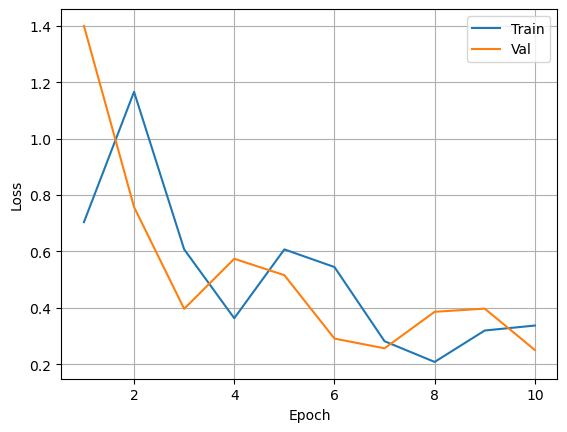

In [839]:
# 학습후 loss시각화
import matplotlib.pyplot as plt

plt.plot(range(1,EPOCH+1),loss_list[0],label='Train')
plt.plot(range(1,EPOCH+1),loss_list[1],label='Val')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()